# NBA Analysis

## En este análisis responderemos a la pregunta: ¿El juego de basketball de la NBA ha evolucionado a tiros de 3pts?

### 1.- Importamos la base de datos

In [3]:
# Importar librerías para realizar futuros cálculos
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [4]:
#Cargar la base de datos
path='C:\\Users\\Gabo\\Documents\\Gabriel Mendoza\\Business\\Crehana\\Análisis de datos con jupyther notebook\\Módulos\\02 Módulo 02 - Caso NBA\\NBA Data Base.xlsx'
df=pd.read_excel(path)

In [5]:
#Muestra aleatoria de la base de datos que cargamos
df.sample(5)

,TEAM_ABBREVIATION,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,Game Type,Season,GAME_NUM,Round
13680,MIA,Miami Heat,2020-01-17,MIA @ OKC,W,241,115,41,84,0.488,...,26,4,3,11,23,7.0,Regular,22019,Regular,Regular
2042,PHX,Phoenix Suns,2012-03-02,PHX vs. LAC,W,240,81,28,80,0.350,...,19,2,8,12,14,3.0,Regular,22011,Regular,Regular
12721,LAC,LA Clippers,2018-11-17,LAC @ BKN,W,240,127,48,95,0.505,...,23,4,1,8,25,-1.4,Regular,22018,Regular,Regular
2359,IND,Indiana Pacers,2012-01-20,IND @ GSW,W,239,94,35,83,0.422,...,25,9,5,11,13,3.0,Regular,22011,Regular,Regular
1272,DEN,Denver Nuggets,2010-10-30,DEN @ HOU,W,240,107,34,90,0.378,...,16,9,4,12,24,13.0,Regular,22010,Regular,Regular


In [6]:
#Revisión de tipo de datos
df.dtypes

TEAM_ABBREVIATION            object
TEAM_NAME                    object
GAME_DATE            datetime64[ns]
MATCHUP                      object
WL                           object
MIN                           int64
PTS                           int64
FGM                           int64
FGA                           int64
FG_PCT                      float64
FG3M                          int64
FG3A                          int64
FG3_PCT                     float64
FTM                           int64
FTA                           int64
FT_PCT                      float64
OREB                          int64
DREB                          int64
REB                           int64
AST                           int64
STL                           int64
BLK                           int64
TOV                           int64
PF                            int64
PLUS_MINUS                  float64
Game Type                    object
Season                       object
GAME_NUM                    

### 2.- Limpieza de la base de datos

In [7]:
# Verifico que no existan valores vacíos
df.isnull().sum()

TEAM_ABBREVIATION    0
TEAM_NAME            0
GAME_DATE            0
MATCHUP              0
WL                   0
MIN                  0
PTS                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PLUS_MINUS           0
Game Type            0
Season               0
GAME_NUM             0
Round                0
dtype: int64

In [8]:
# Tomamos las columnas que son de nuestro interés
df=df[['GAME_DATE','TEAM_NAME','PTS','FGM','FGA','FG3M','FG3A','Game Type']]
df

,GAME_DATE,TEAM_NAME,PTS,FGM,FGA,FG3M,FG3A,Game Type
0,2011-06-12,Dallas Mavericks,105,41,82,11,26,Playoff
1,2011-06-09,Dallas Mavericks,112,39,69,13,19,Playoff
2,2011-06-07,Dallas Mavericks,86,29,73,4,19,Playoff
3,2011-06-05,Miami Heat,88,34,78,8,19,Playoff
4,2011-06-02,Dallas Mavericks,95,36,75,6,17,Playoff
...,...,...,...,...,...,...,...,...
15771,2021-08-04,Los Angeles Lakers,84,27,67,6,22,Regular
15772,2021-08-04,Miami Heat,94,31,65,9,24,Regular
15773,2021-08-03,Golden State Warriors,89,33,76,10,33,Regular
15774,2021-08-03,Miami Heat,80,33,71,7,24,Regular


In [9]:
# Realizamos cálculos finales que necesitaremos para nuestros análisis
df['Total Tiros']=df['FGA']+df['FG3A']
df['Total Tiros Encestados']=df['FGM']+df['FG3M']
df.sample(10)

,GAME_DATE,TEAM_NAME,PTS,FGM,FGA,FG3M,FG3A,Game Type,Total Tiros,Total Tiros Encestados
3207,2013-02-05,Phoenix Suns,96,37,73,4,10,Regular,83,41
4726,2014-02-03,San Antonio Spurs,102,38,81,5,18,Regular,99,43
10140,2016-07-07,Boston Celtics,87,30,62,10,27,Regular,89,40
13113,2018-07-06,Charlotte Hornets,88,30,82,9,35,Regular,117,39
15134,2021-03-02,Phoenix Suns,114,38,77,16,29,Regular,106,54
11197,2017-11-24,Detroit Pistons,99,39,84,14,37,Regular,121,53
7606,2016-02-25,Golden State Warriors,130,53,88,13,25,Regular,113,66
9734,2016-11-25,Chicago Bulls,105,40,90,6,21,Regular,111,46
7695,2016-02-06,Charlotte Hornets,108,38,81,12,27,Regular,108,50
14802,2021-04-18,Atlanta Hawks,129,45,92,13,32,Regular,124,58


In [10]:
# Cambiamos de nombre la fecha y el equipo
df['Fecha']=df['GAME_DATE']
df['Equipo']=df['TEAM_NAME']
df.drop('GAME_DATE', axis=1, inplace=True)
df.drop('TEAM_NAME', axis=1, inplace=True)

In [11]:
df.sample(7)

,PTS,FGM,FGA,FG3M,FG3A,Game Type,Total Tiros,Total Tiros Encestados,Fecha,Equipo
11663,116,42,94,15,47,Playoff,141,57,2019-05-08,Milwaukee Bucks
15156,124,45,85,17,45,Regular,130,62,2021-02-27,Utah Jazz
5022,103,38,83,9,28,Regular,111,47,2013-12-23,Indiana Pacers
2578,105,38,78,4,7,Regular,85,42,2011-12-25,Miami Heat
8991,104,35,72,11,28,Regular,100,46,2017-03-11,Miami Heat
14507,116,43,81,12,26,Playoff,107,55,2021-06-11,Phoenix Suns
12549,113,43,91,12,30,Regular,121,55,2018-12-12,Indiana Pacers


In [12]:
# Reordenamos las columnas
df.columns

Index(['PTS', 'FGM', 'FGA', 'FG3M', 'FG3A', 'Game Type', 'Total Tiros',
       'Total Tiros Encestados', 'Fecha', 'Equipo'],
      dtype='object')

In [13]:
#Reordenamos columnas
df=df[['Fecha', 'Equipo','PTS', 'FGM', 'FGA', 'FG3M', 'FG3A', 'Total Tiros',
       'Total Tiros Encestados','Game Type']]
df.tail()

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados,Game Type
15771,2021-08-04,Los Angeles Lakers,84,27,67,6,22,89,33,Regular
15772,2021-08-04,Miami Heat,94,31,65,9,24,89,40,Regular
15773,2021-08-03,Golden State Warriors,89,33,76,10,33,109,43,Regular
15774,2021-08-03,Miami Heat,80,33,71,7,24,95,40,Regular
15775,2021-08-03,Memphis Grizzlies,104,41,86,10,26,112,51,Regular


In [14]:
# Aquí seleccionamos solo los juegos que hacen referencia únicamente a los playoffs de la NBA
df=df[df['Game Type']=='Playoff']
df.head()

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados,Game Type
0,2011-06-12,Dallas Mavericks,105,41,82,11,26,108,52,Playoff
1,2011-06-09,Dallas Mavericks,112,39,69,13,19,88,52,Playoff
2,2011-06-07,Dallas Mavericks,86,29,73,4,19,92,33,Playoff
3,2011-06-05,Miami Heat,88,34,78,8,19,97,42,Playoff
4,2011-06-02,Dallas Mavericks,95,36,75,6,17,92,42,Playoff


In [15]:
# Finalmente separamos las bases en dos grupos. El periodo 1 con fecha antes del 2016  y el segundo grupo con los partidos a partir del 2016
df.sort_values('Fecha',ascending=True)
df1=df[df['Fecha']<'2016-01-01']
df2=df[df['Fecha']>='2016-01-01']

In [16]:
df1

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados,Game Type
0,2011-06-12,Dallas Mavericks,105,41,82,11,26,108,52,Playoff
1,2011-06-09,Dallas Mavericks,112,39,69,13,19,88,52,Playoff
2,2011-06-07,Dallas Mavericks,86,29,73,4,19,92,33,Playoff
3,2011-06-05,Miami Heat,88,34,78,8,19,97,42,Playoff
4,2011-06-02,Dallas Mavericks,95,36,75,6,17,92,42,Playoff
...,...,...,...,...,...,...,...,...,...,...
5706,2015-04-19,Atlanta Hawks,99,34,79,10,30,109,44,Playoff
5707,2015-04-18,Houston Rockets,118,38,85,10,25,110,48,Playoff
5708,2015-04-18,Chicago Bulls,103,38,83,12,32,115,50,Playoff
5709,2015-04-18,Golden State Warriors,106,37,81,11,29,110,48,Playoff


In [17]:
df2

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados,Game Type
7147,2016-06-19,Cleveland Cavaliers,93,33,82,6,25,107,39,Playoff
7148,2016-06-16,Cleveland Cavaliers,115,40,77,10,27,104,50,Playoff
7149,2016-06-13,Cleveland Cavaliers,112,44,83,10,24,107,54,Playoff
7150,2016-06-10,Golden State Warriors,108,33,81,17,36,117,50,Playoff
7151,2016-06-08,Cleveland Cavaliers,120,48,91,12,25,116,60,Playoff
...,...,...,...,...,...,...,...,...,...,...
14555,2021-05-23,Phoenix Suns,99,40,86,9,28,114,49,Playoff
14556,2021-05-22,Dallas Mavericks,113,38,76,17,36,112,55,Playoff
14557,2021-05-22,Portland Trail Blazers,123,43,91,19,40,131,62,Playoff
14558,2021-05-22,Brooklyn Nets,104,35,84,8,34,118,43,Playoff


In [18]:
# Reseteamos el índice para la base del primer periodo
df1=df1.reset_index(drop=True)
df1

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados,Game Type
0,2011-06-12,Dallas Mavericks,105,41,82,11,26,108,52,Playoff
1,2011-06-09,Dallas Mavericks,112,39,69,13,19,88,52,Playoff
2,2011-06-07,Dallas Mavericks,86,29,73,4,19,92,33,Playoff
3,2011-06-05,Miami Heat,88,34,78,8,19,97,42,Playoff
4,2011-06-02,Dallas Mavericks,95,36,75,6,17,92,42,Playoff
...,...,...,...,...,...,...,...,...,...,...
415,2015-04-19,Atlanta Hawks,99,34,79,10,30,109,44,Playoff
416,2015-04-18,Houston Rockets,118,38,85,10,25,110,48,Playoff
417,2015-04-18,Chicago Bulls,103,38,83,12,32,115,50,Playoff
418,2015-04-18,Golden State Warriors,106,37,81,11,29,110,48,Playoff


In [19]:
# Reseteamos el índice para la base del segundo periodo
df2=df2.reset_index(drop=True)
df2

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados,Game Type
0,2016-06-19,Cleveland Cavaliers,93,33,82,6,25,107,39,Playoff
1,2016-06-16,Cleveland Cavaliers,115,40,77,10,27,104,50,Playoff
2,2016-06-13,Cleveland Cavaliers,112,44,83,10,24,107,54,Playoff
3,2016-06-10,Golden State Warriors,108,33,81,17,36,117,50,Playoff
4,2016-06-08,Cleveland Cavaliers,120,48,91,12,25,116,60,Playoff
...,...,...,...,...,...,...,...,...,...,...
492,2021-05-23,Phoenix Suns,99,40,86,9,28,114,49,Playoff
493,2021-05-22,Dallas Mavericks,113,38,76,17,36,112,55,Playoff
494,2021-05-22,Portland Trail Blazers,123,43,91,19,40,131,62,Playoff
495,2021-05-22,Brooklyn Nets,104,35,84,8,34,118,43,Playoff


### 3.- Análisis Estadístico

#### Lo que queremos lograr en este apartado es comparar las estadísticas descriptivas de los tiros intentados de 3pts para ambos periodos

In [20]:
# Partimos ambas bases para obtener las estadísticas descriptivas de los tiros de 3pts
TirosTresP1=df1['FG3A'].describe(include=all)
TirosTresP2=df2['FG3A'].describe(include=all)

In [21]:
# Cambiamos el nombre de la primer base
TirosTresP1=TirosTresP1.to_frame()
TirosTresP1['FG3A_P1']=TirosTresP1['FG3A']
TirosTresP1

,FG3A,FG3A_P1
count,420.000000,420.000000
mean,20.757143,20.757143
std,6.260310,6.260310
min,6.000000,6.000000
25%,16.000000,16.000000
50%,20.000000,20.000000
75%,25.000000,25.000000
max,41.000000,41.000000


In [22]:
# Eliminamos la columna que no nos interesa
TirosTresP1.drop('FG3A',axis=1, inplace=True)
TirosTresP1

,FG3A_P1
count,420.000000
mean,20.757143
std,6.260310
min,6.000000
25%,16.000000
50%,20.000000
75%,25.000000
max,41.000000


In [23]:
# Realizamos el mismo procedimiento para el periodo #2
TirosTresP2=TirosTresP2.to_frame()
TirosTresP2['FG3A_P2']=TirosTresP2['FG3A']
TirosTresP2

,FG3A,FG3A_P2
count,497.000000,497.000000
mean,31.619718,31.619718
std,7.758337,7.758337
min,11.000000,11.000000
25%,26.000000,26.000000
50%,31.000000,31.000000
75%,37.000000,37.000000
max,56.000000,56.000000


In [24]:
# Eliminamos la columna que no es de nuestro interés
TirosTresP2.drop('FG3A',axis=1, inplace=True)
TirosTresP2

,FG3A_P2
count,497.000000
mean,31.619718
std,7.758337
min,11.000000
25%,26.000000
50%,31.000000
75%,37.000000
max,56.000000


In [25]:
# Unimos Nuestras tablas para realizar nuestro primer análisis: 1° creamos una nueva dataframe
TirosTres=pd.DataFrame(columns=['FG3A_P1','FG3A_P2'])
TirosTres

,FG3A_P1,FG3A_P2


In [26]:
# Cargamos las estadísticas en nuestra nueva tabla
TirosTres['FG3A_P1']=TirosTresP1['FG3A_P1']
TirosTres['FG3A_P2']=TirosTresP2['FG3A_P2']

In [27]:
TirosTres.round()

,FG3A_P1,FG3A_P2
count,420.0,497.0
mean,21.0,32.0
std,6.0,8.0
min,6.0,11.0
25%,16.0,26.0
50%,20.0,31.0
75%,25.0,37.0
max,41.0,56.0


#### Aquí podemos obtener nuestras primeras conclusiones sobre los tiros de 3 puntos

### 4.- Análisis Estadístico para tiros de 2pts

#### Lo que queremos lograr en este apartado es comparar las estadísticas descriptivas de los tiros intentados de 2pts para ambos periodos

In [28]:
# Separamos la variable de tiros de 2pts para cada base y obtenemos las estadísticas
TirosDosP1=df1['FGA'].describe(include=all)
TirosDosP2=df2['FGA'].describe(include=all)

In [29]:
# Acomodamos la base de datos para el primer periodo
TirosDosP1=TirosDosP1.to_frame()
TirosDosP1['FGA_P1']=TirosDosP1['FGA']
TirosDosP1

,FGA,FGA_P1
count,420.000000,420.000000
mean,79.466667,79.466667
std,7.177686,7.177686
min,64.000000,64.000000
25%,75.000000,75.000000
50%,79.000000,79.000000
75%,83.000000,83.000000
max,109.000000,109.000000


In [30]:
TirosDosP1.drop('FGA',axis=1, inplace=True)
TirosDosP1

,FGA_P1
count,420.000000
mean,79.466667
std,7.177686
min,64.000000
25%,75.000000
50%,79.000000
75%,83.000000
max,109.000000


In [31]:
# Acomodamos la base de datos para el segundo periodo
TirosDosP2=TirosDosP2.to_frame()
TirosDosP2['FGA_P2']=TirosDosP2['FGA']
TirosDosP2

,FGA,FGA_P2
count,497.000000,497.000000
mean,85.116700,85.116700
std,6.901851,6.901851
min,61.000000,61.000000
25%,81.000000,81.000000
50%,85.000000,85.000000
75%,89.000000,89.000000
max,124.000000,124.000000


In [32]:
TirosDosP2.drop('FGA',axis=1, inplace=True)
TirosDosP2

,FGA_P2
count,497.000000
mean,85.116700
std,6.901851
min,61.000000
25%,81.000000
50%,85.000000
75%,89.000000
max,124.000000


In [33]:
# Unimos Nuestras tablas para realizar nuestro segundo análisis
TirosDos=pd.DataFrame(columns=['FGA_P1','FGA_P2'])
TirosDos

,FGA_P1,FGA_P2


In [34]:
TirosDos['FGA_P1']=TirosDosP1['FGA_P1']
TirosDos['FGA_P2']=TirosDosP2['FGA_P2']

In [35]:
TirosDos.round()

,FGA_P1,FGA_P2
count,420.0,497.0
mean,79.0,85.0
std,7.0,7.0
min,64.0,61.0
25%,75.0,81.0
50%,79.0,85.0
75%,83.0,89.0
max,109.0,124.0


#### Aquí podemos obtener nuestras primeras conclusiones sobre los tiros de 2 puntos

### 5.- Análisis Estadístico del juego y su evolución

In [36]:
#Unimos ambas bases creando una nueva
Tiros=pd.DataFrame(columns=['FG3A_P1','FG3A_P2','FGA_P1','FGA_P2'])
Tiros

,FG3A_P1,FG3A_P2,FGA_P1,FGA_P2


In [37]:
# Aquí es donde unimos ambas bases
Tiros['FG3A_P1']=TirosTresP1['FG3A_P1']
Tiros['FG3A_P2']=TirosTresP2['FG3A_P2']
Tiros['FGA_P1']=TirosDosP1['FGA_P1']
Tiros['FGA_P2']=TirosDosP2['FGA_P2']

In [38]:
Tiros.round()

,FG3A_P1,FG3A_P2,FGA_P1,FGA_P2
count,420.0,497.0,420.0,497.0
mean,21.0,32.0,79.0,85.0
std,6.0,8.0,7.0,7.0
min,6.0,11.0,64.0,61.0
25%,16.0,26.0,75.0,81.0
50%,20.0,31.0,79.0,85.0
75%,25.0,37.0,83.0,89.0
max,41.0,56.0,109.0,124.0


#### CONCLUSIÓN ESTADÍSTICA

### 5.- Análisis Gráfico

#### Gráfico de Pie

In [39]:
# Transponemos nuestra base de datos
df1.sample(2)

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados,Game Type
277,2014-05-10,Brooklyn Nets,104,38,72,15,25,97,53,Playoff
114,2012-05-16,Oklahoma City Thunder,77,29,69,6,17,86,35,Playoff


In [40]:
# Filtramos las columnas de interés
df1_pie=df1[['FGA','FG3A']]
df1_pie

,FGA,FG3A
0,82,26
1,69,19
2,73,19
3,78,19
4,75,17
...,...,...
415,79,30
416,85,25
417,83,32
418,81,29


In [41]:
# Transponemos la base
df1_pie=df1_pie.T
df1_pie

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
FGA,82,69,73,78,75,80,66,78,75,81,...,86,81,88,82,78,79,85,83,81,99
FG3A,26,19,19,19,17,24,15,20,13,25,...,30,33,9,31,18,30,25,32,29,21


In [42]:
#Creamos el total de tiros del periodo
df1_pie['TotalTiros']=df1_pie.sum(axis=1)
df1_pie

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,TotalTiros
FGA,82,69,73,78,75,80,66,78,75,81,...,81,88,82,78,79,85,83,81,99,33376
FG3A,26,19,19,19,17,24,15,20,13,25,...,33,9,31,18,30,25,32,29,21,8718


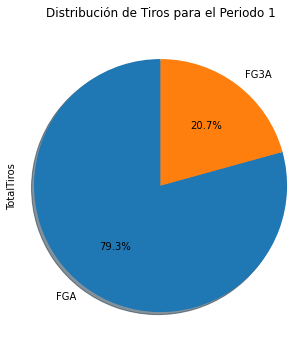

In [43]:
# Creamos nuestro gráfico de Pie

df1_pie['TotalTiros'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # añadimos porcentajes
                            startangle=90,     # ángulo de comienzo
                            shadow=True,       # añadimos sombra      
                            )

plt.title('Distribución de Tiros para el Periodo 1')
plt.axis('equal') 

plt.show()

In [44]:
# Transponemos nuestra base de datos
df2_pie=df2[['FGA','FG3A']]
df2_pie

,FGA,FG3A
0,82,25
1,77,27
2,83,24
3,81,36
4,91,25
...,...,...
492,86,28
493,76,36
494,91,40
495,84,34


In [45]:
df2_pie=df2_pie.T
df2_pie

,0,1,2,3,4,5,6,7,8,9,...,487,488,489,490,491,492,493,494,495,496
FGA,82,77,83,81,91,81,87,85,88,74,...,94,86,90,93,100,86,76,91,84,96
FG3A,25,27,24,36,25,33,27,37,45,31,...,53,28,34,32,20,28,36,40,34,31


In [46]:
df2_pie['TotalTiros']=df2_pie.sum(axis=1)
df2_pie

,0,1,2,3,4,5,6,7,8,9,...,488,489,490,491,492,493,494,495,496,TotalTiros
FGA,82,77,83,81,91,81,87,85,88,74,...,86,90,93,100,86,76,91,84,96,42303
FG3A,25,27,24,36,25,33,27,37,45,31,...,28,34,32,20,28,36,40,34,31,15715


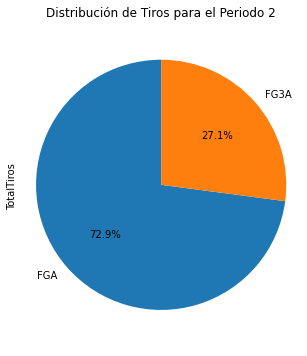

In [47]:

df2_pie['TotalTiros'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%',
                            startangle=90,      # add shadow      
                            )

plt.title('Distribución de Tiros para el Periodo 2')
plt.axis('equal')

plt.show()

#### Juntamos las gráficas

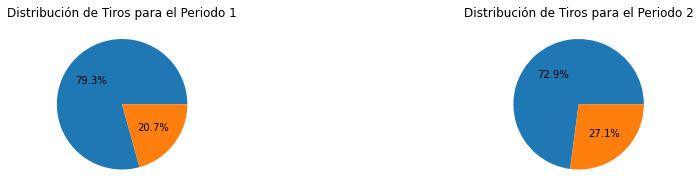

In [48]:
f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.pie(df1_pie['TotalTiros'], autopct='%1.1f%%' )
ax1.set_title('Distribución de Tiros para el Periodo 1')
ax2.pie(df2_pie['TotalTiros'], autopct='%1.1f%%')
ax2.set_title('Distribución de Tiros para el Periodo 2')

plt.show()

#### Gráfico de lineas

In [49]:
df.head()

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados,Game Type
0,2011-06-12,Dallas Mavericks,105,41,82,11,26,108,52,Playoff
1,2011-06-09,Dallas Mavericks,112,39,69,13,19,88,52,Playoff
2,2011-06-07,Dallas Mavericks,86,29,73,4,19,92,33,Playoff
3,2011-06-05,Miami Heat,88,34,78,8,19,97,42,Playoff
4,2011-06-02,Dallas Mavericks,95,36,75,6,17,92,42,Playoff


In [50]:
# Creamos una subbase con la que ya tenemos anteriormente
df_line=df
df_line

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados,Game Type
0,2011-06-12,Dallas Mavericks,105,41,82,11,26,108,52,Playoff
1,2011-06-09,Dallas Mavericks,112,39,69,13,19,88,52,Playoff
2,2011-06-07,Dallas Mavericks,86,29,73,4,19,92,33,Playoff
3,2011-06-05,Miami Heat,88,34,78,8,19,97,42,Playoff
4,2011-06-02,Dallas Mavericks,95,36,75,6,17,92,42,Playoff
...,...,...,...,...,...,...,...,...,...,...
14555,2021-05-23,Phoenix Suns,99,40,86,9,28,114,49,Playoff
14556,2021-05-22,Dallas Mavericks,113,38,76,17,36,112,55,Playoff
14557,2021-05-22,Portland Trail Blazers,123,43,91,19,40,131,62,Playoff
14558,2021-05-22,Brooklyn Nets,104,35,84,8,34,118,43,Playoff


In [51]:
#Obtenemos el año
df_line['Year']=df_line['Fecha'].dt.year
df_line

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados,Game Type,Year
0,2011-06-12,Dallas Mavericks,105,41,82,11,26,108,52,Playoff,2011
1,2011-06-09,Dallas Mavericks,112,39,69,13,19,88,52,Playoff,2011
2,2011-06-07,Dallas Mavericks,86,29,73,4,19,92,33,Playoff,2011
3,2011-06-05,Miami Heat,88,34,78,8,19,97,42,Playoff,2011
4,2011-06-02,Dallas Mavericks,95,36,75,6,17,92,42,Playoff,2011
...,...,...,...,...,...,...,...,...,...,...,...
14555,2021-05-23,Phoenix Suns,99,40,86,9,28,114,49,Playoff,2021
14556,2021-05-22,Dallas Mavericks,113,38,76,17,36,112,55,Playoff,2021
14557,2021-05-22,Portland Trail Blazers,123,43,91,19,40,131,62,Playoff,2021
14558,2021-05-22,Brooklyn Nets,104,35,84,8,34,118,43,Playoff,2021


In [52]:
df_line.columns

Index(['Fecha', 'Equipo', 'PTS', 'FGM', 'FGA', 'FG3M', 'FG3A', 'Total Tiros',
       'Total Tiros Encestados', 'Game Type', 'Year'],
      dtype='object')

In [53]:
#Acomodamos las columnas de nuestra base
df_line=df_line[['Year','PTS', 'FGM', 'FGA', 'FG3M', 'FG3A', 'Total Tiros',
       'Total Tiros Encestados']]

In [54]:
# Agrupamos la base por el año
df_line=df_line.groupby(['Year'],as_index=False).sum()

In [55]:
df_line

,Year,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados
0,2011,8002,2854,6261,557,1457,7718,3411
1,2012,8210,3035,6546,532,1498,8044,3567
2,2013,8580,3166,6732,632,1712,8444,3798
3,2014,9317,3386,7048,740,1926,8974,4126
4,2015,8597,3107,6789,818,2125,8914,3925
5,2016,9208,3362,7179,897,2228,9407,4259
6,2017,8915,3255,6623,928,2348,8971,4183
7,2018,9092,3313,6904,970,2538,9442,4283
8,2019,9326,3353,7127,1006,2682,9809,4359
9,2020,9576,3408,7062,1160,3009,10071,4568


In [56]:
# Filtramos las columnas que deseamos utilizar para la gráfica de línea
df_line_final=df_line[['FGA','FG3A']]

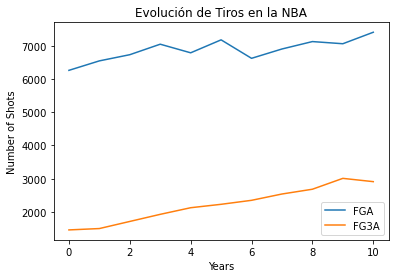

In [57]:
df_line_final.plot(kind='line')

plt.title('Evolución de Tiros en la NBA')
plt.ylabel('Number of Shots')
plt.xlabel('Years')

plt.show()